## Section 1. Import Libraries

In [17]:
import numpy as np

In [18]:
import pandas as pd

In [19]:
import matplotlib.pyplot as plt

In [20]:
import seaborn as sns

In [21]:
pd.set_option('display.max_columns', 100)

In [22]:
plt.style.use('seaborn-v0_8')

## Section 2. Import Data

In [23]:
df_train = pd.read_csv("../../Data/train.csv")

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
df_test = pd.read_csv("../../Data/test.csv")

df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [25]:
df_gender_sub = pd.read_csv("../../Data/gender_submission.csv")

df_gender_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [26]:
df_train.info()
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Accurate Visuals

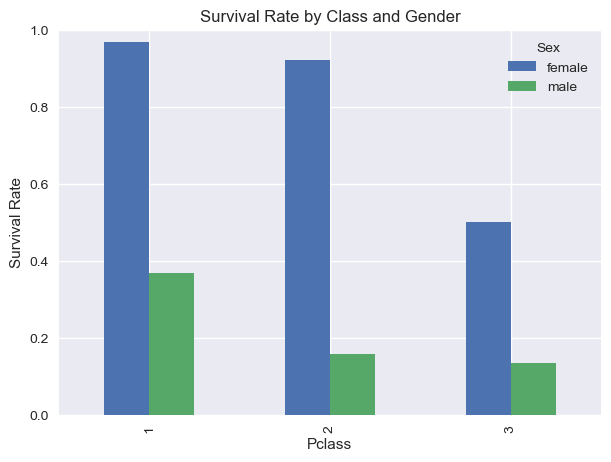

In [28]:
import os
import warnings
import sys

## check if the output directory exists, if not create it
output_dir = "../../Analysis/accurate"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

pd.crosstab(
    df_train["Pclass"],
    df_train["Sex"],
    values=df_train["Survived"],
    aggfunc="mean"
).plot(kind="bar", figsize=(7,5))

plt.title("Survival Rate by Class and Gender")
plt.ylabel("Survival Rate")
plt.ylim(0,1)
plt.savefig("../../Analysis/accurate/survival_rate_by_classgender.png")
plt.show()

### Survival Rate by Passenger Class and Gender

This visualization shows survival rates broken down by both passenger class (`Pclass`) and gender (`Sex`). Each bar represents the average survival rate for that gender within a given class, allowing us to compare survival outcomes across multiple demographic dimensions at once.

This chart reveals an interaction effect: survival was not determined by class or gender alone. Women consistently have higher survival rates than men within each class, and passengers in higher classes generally have higher survival rates than those in lower classes. In particular, the lowest survival rates tend to appear among third-class men, while first-class women show the highest survival rates. This provides a more complete story than separate “by class” and “by gender” charts because it shows how these variables combine to shape outcomes.

This is an effective and ethical visualization because it uses the full dataset, applies a consistent scale (0 to 1 for survival rate), and clearly labels categories so viewers can make accurate comparisons. It increases insight without relying on distortion or selective filtering.

/var/folders/mm/xkwn8c6n2djgfy47v6p2myf00000gn/T/ipykernel_95905/4190836767.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df_train.groupby(pd.cut(df_train["Age"], bins=10))["Survived"].mean()


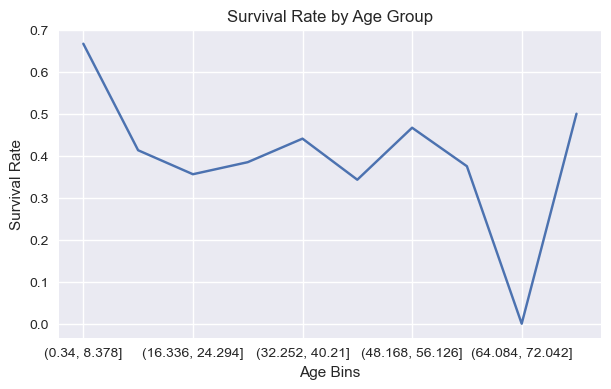

In [29]:
age_survival = df_train.groupby(pd.cut(df_train["Age"], bins=10))["Survived"].mean()

age_survival.plot(figsize=(7,4))
plt.title("Survival Rate by Age Group")
plt.ylabel("Survival Rate")
plt.xlabel("Age Bins")
plt.savefig("../../Analysis/accurate/survival_rate_by_age.png")
plt.show()

### Survival Rate by Age Group

This visualization displays the average survival rate across different age ranges. Each point represents the proportion of passengers within a specific age bin who survived. Rather than showing how many passengers were in each age group, this chart focuses on likelihood of survival as age changes.

The trend suggests that very young passengers had higher survival rates, while survival declines across many adult age groups, particularly among older passengers. This pattern aligns with historical evacuation practices that prioritized children and families.

This is an effective and ethical visualization because it uses the full dataset, applies consistent binning across age groups, and avoids any manipulation of axes or scaling. It clearly communicates how survival probability varies with age without exaggerating differences.

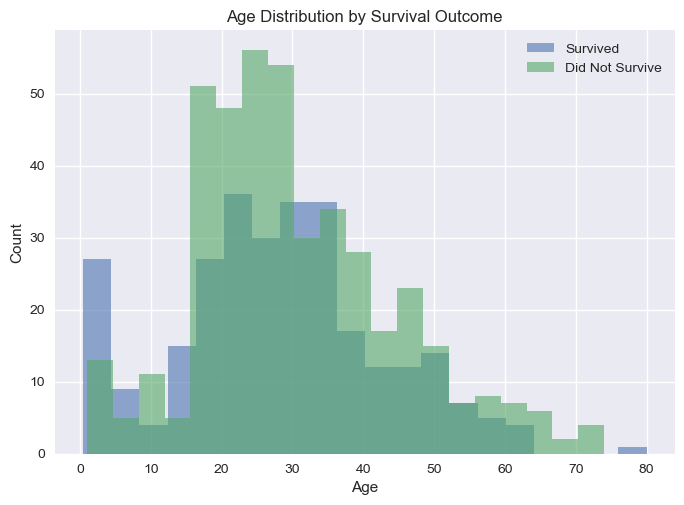

In [30]:
plt.hist(df_train[df_train["Survived"]==1]["Age"].dropna(), bins=20, alpha=0.6, label="Survived")
plt.hist(df_train[df_train["Survived"]==0]["Age"].dropna(), bins=20, alpha=0.6, label="Did Not Survive")

plt.legend()
plt.title("Age Distribution by Survival Outcome")
plt.xlabel("Age")
plt.ylabel("Count")
plt.savefig("../../Analysis/accurate/age_distribution_by_survival.png")
plt.show()

### Age Distribution by Survival Outcome

This visualization compares the full age distributions of passengers who survived and those who did not survive. By overlaying both histograms with transparency, the chart allows for direct comparison of the shapes and spread of the two groups.

The distribution shows that survivors skew younger overall, while non-survivors are more concentrated in adult age ranges. However, there is clear overlap between the groups, indicating that age alone did not determine survival outcomes.

This visualization is effective because it presents both groups simultaneously without hiding data, uses consistent bin sizes, and avoids distortion. It provides insight into differences in age patterns while maintaining clarity and transparency.

## Misleading Visuals

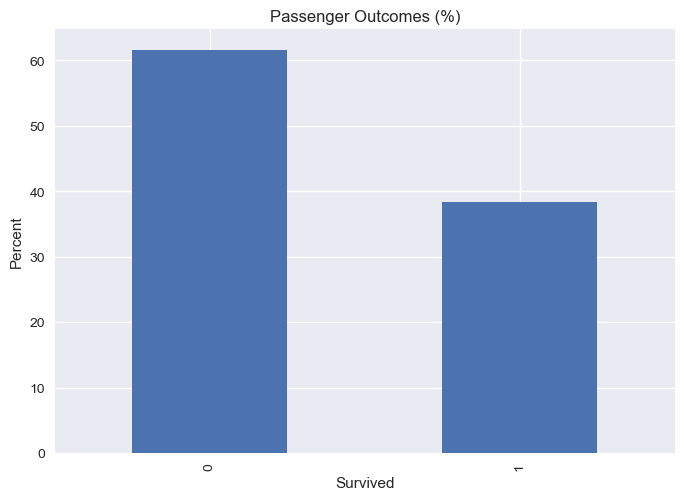

In [31]:
#check if output directory exists, if not create it
output_dir = "../../Analysis/misleading"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

(df_train["Survived"].value_counts(normalize=True)*100).plot(kind="bar")

plt.title("Passenger Outcomes (%)")
plt.ylabel("Percent")
plt.savefig("../../Analysis/misleading/passenger_outpercent.png")
plt.show()

### Passenger Outcomes (%) — Misleading Visualization

This chart presents passenger survival outcomes as percentages rather than raw counts. While the percentages are technically accurate, the visualization reframes the data in a way that can reduce the perceived magnitude of loss.

By focusing on percentages, the chart removes the emotional and contextual weight of the total number of deaths. Viewers may perceive the outcomes as more balanced than they were in reality, despite the fact that a majority of passengers did not survive.

This visualization demonstrates how normalization can subtly shift interpretation without altering the underlying data. Although no values are manipulated, the framing influences perception, highlighting the ethical responsibility involved in choosing how to present information.

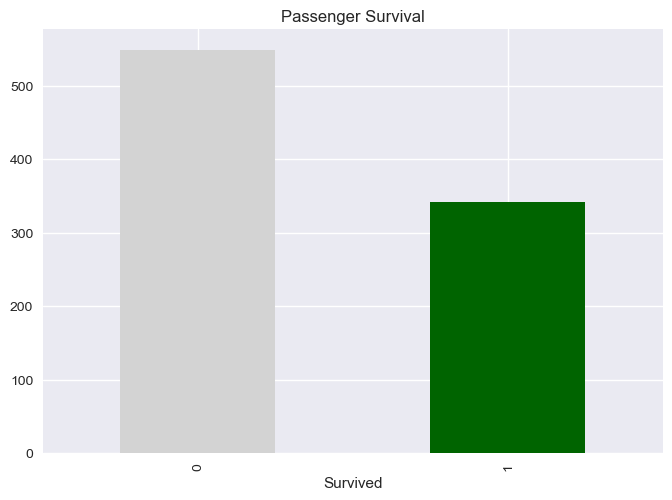

In [32]:
df_train["Survived"].value_counts().plot(
    kind="bar",
    color=["lightgray", "darkgreen"]
)

plt.title("Passenger Survival")
plt.savefig("../../Analysis/misleading/passenger_survival.png")
plt.show()

### Passenger Survival — Misleading Color Emphasis

This visualization displays the number of passengers who survived versus did not survive using a simple bar chart, but it intentionally uses color emphasis to influence interpretation. The “Did Not Survive” bar is shown in a light, muted gray, while the “Survived” bar is shown in a strong, saturated green.

Although the underlying counts may be accurate, the design choice encourages viewers to focus on the survival outcome by making it visually dominant. Green is commonly associated with “good” or “success,” and the higher saturation draws attention, which can make survival feel more prominent or positive than the overall tragedy suggests—especially since a large portion of passengers did not survive.

This is a good example of a misleading visualization because it demonstrates how visual emphasis (color intensity and emotional association) can shape perception even without changing the data. It highlights an ethical risk in visualization: design choices can subtly direct viewers toward a preferred narrative.

/var/folders/mm/xkwn8c6n2djgfy47v6p2myf00000gn/T/ipykernel_95905/3284483561.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  misleading_age_survival = df_train.groupby("age_groups_misleading")["Survived"].mean()


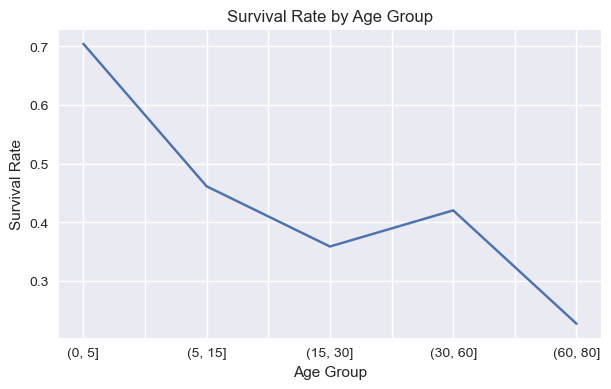

In [33]:
# Misleading age bins (uneven widths)
custom_bins = [0, 5, 15, 30, 60, 80]   # Notice how 30–60 is HUGE

df_train["age_groups_misleading"] = pd.cut(df_train["Age"], bins=custom_bins)

misleading_age_survival = df_train.groupby("age_groups_misleading")["Survived"].mean()

misleading_age_survival.plot(figsize=(7,4))

plt.title("Survival Rate by Age Group")
plt.ylabel("Survival Rate")
plt.xlabel("Age Group")
plt.savefig("../../Analysis/misleading/survival_rate_byage_msl.png")
plt.show()

### Survival Rate by Age Group — Misleading Bin Grouping

This visualization presents survival rates across age groups using uneven bin widths. While the chart appears clean and statistically valid, the age ranges are not evenly distributed. One bin spans a much wider range of ages than the others, compressing variation within a large portion of the population.

By grouping many adult ages into a single category, differences in survival risk within that range are hidden, which can make survival trends appear smoother or more favorable than they truly are. Meanwhile, narrower bins at younger ages emphasize those groups disproportionately.

This visualization demonstrates how subtle grouping choices can significantly influence interpretation without altering the underlying data values. Although no data is removed or rescaled, the unequal bins distort how risk is perceived, making this a particularly difficult form of misleading visualization to detect.